In [13]:
import gym

#Import game
import gym_super_mario_bros

#Import Joypad
from nes_py.wrappers import JoypadSpace

#Import Controls
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT

#FrameStacking e GreyScaling
from gym.wrappers import GrayScaleObservation

#Vectorization
from stable_baselines3.common.vec_env import VecFrameStack, DummyVecEnv

#Graphs
from matplotlib import pyplot as plt

import os

#Proximal Policy Optimization
from stable_baselines3 import PPO

#To save models
from stable_baselines3.common.callbacks import BaseCallback

In [14]:
# [1] - Setup base environment
env = gym_super_mario_bros.make("SuperMarioBros-v0", render_mode='human', apply_api_compatibility=True)
#256 possible actions
print(env.action_space)

# [2] - Simplify the controls, with wrapping the model will have only 7 possible actions
env = JoypadSpace(env, SIMPLE_MOVEMENT)
print(env.action_space)

# [3] - Grayscale
env = GrayScaleObservation(env, keep_dim=True)

# [4] - Wrap inside a dummy envorinment
env = DummyVecEnv([lambda: env])

# [5] - Stack four frames
env = VecFrameStack(env, 4, channels_order='last')

#JoypadSpace doesn't correctly override the reset() method of Wrapper.
JoypadSpace.reset = lambda self, **kwargs: self.env.reset(**kwargs)

c:\Users\Taba\Desktop\Super Mario\mlenv\Lib\site-packages\gym\envs\registration.py:555: UserWarning: WARN: The environment SuperMarioBros-v0 is out of date. You should consider upgrading to version `v3`.
  logger.warn(
c:\Users\Taba\Desktop\Super Mario\mlenv\Lib\site-packages\gym\envs\registration.py:627: UserWarning: WARN: The environment creator metadata doesn't include `render_modes`, contains: ['render.modes', 'video.frames_per_second']
  logger.warn(


Discrete(256)
Discrete(7)


c:\Users\Taba\Desktop\Super Mario\mlenv\Lib\site-packages\stable_baselines3\common\vec_env\patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


# Test Model

In [15]:
##Hyperparametri
trajectory = 4096
iterations = 5

experiments = trajectory * iterations

In [16]:
#Functions
def get_max_x(infos):

    max_x = 0

    for i in range(0,len(infos)):
        x = infos[i][0]['x_pos']
        if infos[i][0]['world'] == 1 and x > max_x:
            max_x = x

    return max_x

def get_reward(rewards, iterations):

    r =  sum(rewards) / iterations

    return r

In [17]:
i = 100000
list_rewards = []
list_max_x = []

for i in range(i,3600000,100000):
    filename = "best_model_" + str(i) + ".zip"
    print("Opnening " + filename)

    model = PPO.load('./train/'+ filename)

    rewards = []
    infos = []
    steps = 0

    #Game starting
    state = env.reset()

    while steps < experiments:

        action, _state = model.predict(state)
        
        state, reward, done, info = env.step(action)

        rewards.append(reward)
        infos.append(info)
        
        steps = steps + 1

        env.render()


    list_rewards.append(get_reward(rewards,iterations))
    list_max_x.append(get_max_x(infos))

    del model

Opnening best_model_100000.zip
Opnening best_model_200000.zip
Opnening best_model_300000.zip
Opnening best_model_400000.zip
Opnening best_model_500000.zip
Opnening best_model_600000.zip
Opnening best_model_700000.zip
Opnening best_model_800000.zip
Opnening best_model_900000.zip
Opnening best_model_1000000.zip
Opnening best_model_1100000.zip
Opnening best_model_1200000.zip
Opnening best_model_1300000.zip
Opnening best_model_1400000.zip
Opnening best_model_1500000.zip
Opnening best_model_1600000.zip
Opnening best_model_1700000.zip
Opnening best_model_1800000.zip
Opnening best_model_1900000.zip
Opnening best_model_2000000.zip
Opnening best_model_2100000.zip
Opnening best_model_2200000.zip
Opnening best_model_2300000.zip
Opnening best_model_2400000.zip
Opnening best_model_2500000.zip
Opnening best_model_2600000.zip
Opnening best_model_2700000.zip
Opnening best_model_2800000.zip
Opnening best_model_2900000.zip
Opnening best_model_3000000.zip
Opnening best_model_3100000.zip
Opnening best_mod

In [18]:
list_max_x

[723,
 898,
 1153,
 1410,
 1435,
 2476,
 1433,
 1952,
 3161,
 1132,
 1125,
 1812,
 2024,
 1949,
 1527,
 2471,
 2227,
 2022,
 2024,
 3161,
 3161,
 1154,
 1418,
 1521,
 2473,
 1796,
 1945,
 1793,
 3161,
 2472,
 3161,
 2031,
 3161,
 2472,
 2472]

In [19]:
list_rewards

[array([379.], dtype=float32),
 array([897.], dtype=float32),
 array([912.8], dtype=float32),
 array([2051.], dtype=float32),
 array([3190.2], dtype=float32),
 array([3591.2], dtype=float32),
 array([2612.6], dtype=float32),
 array([4464.], dtype=float32),
 array([1876.6], dtype=float32),
 array([743.], dtype=float32),
 array([325.6], dtype=float32),
 array([5873.4], dtype=float32),
 array([5614.], dtype=float32),
 array([5051.], dtype=float32),
 array([5453.2], dtype=float32),
 array([6536.2], dtype=float32),
 array([5884.2], dtype=float32),
 array([5052.4], dtype=float32),
 array([7057.6], dtype=float32),
 array([6970.4], dtype=float32),
 array([4726.8], dtype=float32),
 array([1076.4], dtype=float32),
 array([2313.4], dtype=float32),
 array([6189.8], dtype=float32),
 array([7005.6], dtype=float32),
 array([6748.2], dtype=float32),
 array([6657.6], dtype=float32),
 array([5131.6], dtype=float32),
 array([4268.6], dtype=float32),
 array([5824.], dtype=float32),
 array([7284.2], dtype=

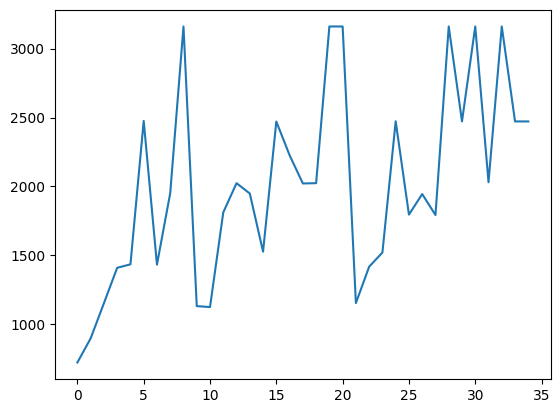

In [20]:
plt.plot(list_max_x)

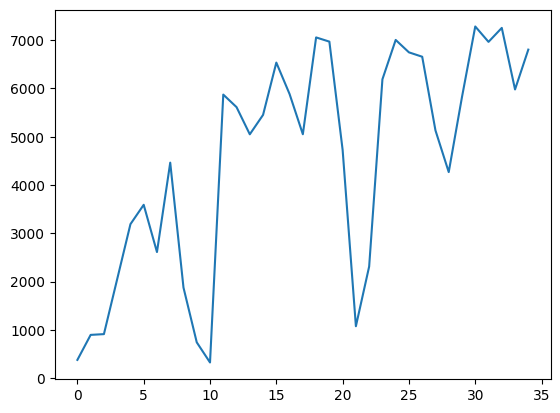

In [21]:
plt.plot(list_rewards)